In [1]:
import funciones_nba_pca
from funciones_nba_pca import *

- Separar por equipos
- Sacar la media de cada equipo
- Aunar la media de cada equipo
- Clusterizar por tipo de equipo

In [2]:
df = pd.read_csv('DataFrameForModel.csv')

In [3]:
df_mean = create_mean_teams(df)

In [4]:
df_mean = compact_data(df_mean)

# PCA CLUSTER

Vamos a hacer la diferencia entre las estadisticas de equipo (Tm_) y las estadísticas de Oponente (Ag_), así como la media de los jugadores, para reducir el número de variables que clusterizar en el PCA.

,Explained Variance,FG_Diff,FG%_Diff,2P_Diff,2P%_Diff,3P_Diff,3P%_Diff,FT_Diff,FT%_Diff,3PAr_Diff,TS%_Diff_Home,TRB_Diff_Home,AST_Diff_Home,PTS_Diff_Home,+/-_Diff_Home,ORtg,DRtg
Dimension 1,0.3642,-0.3415,-0.3768,-0.0902,-0.3393,-0.2868,-0.3651,-0.0457,-0.2718,-0.1425,0.2042,-0.0258,0.1036,0.2035,0.0085,-0.3363,0.3140
Dimension 2,0.1947,0.1828,0.1032,0.4864,-0.0844,-0.3916,-0.0258,0.0897,0.0158,-0.4911,-0.2371,-0.3591,-0.0885,-0.1700,0.2626,-0.1108,-0.0744
Dimension 3,0.0980,0.2744,0.1215,0.2776,0.1138,-0.0247,0.0103,-0.1885,-0.1709,-0.0939,0.0450,0.2481,0.6182,0.5164,0.1268,0.1309,0.0076


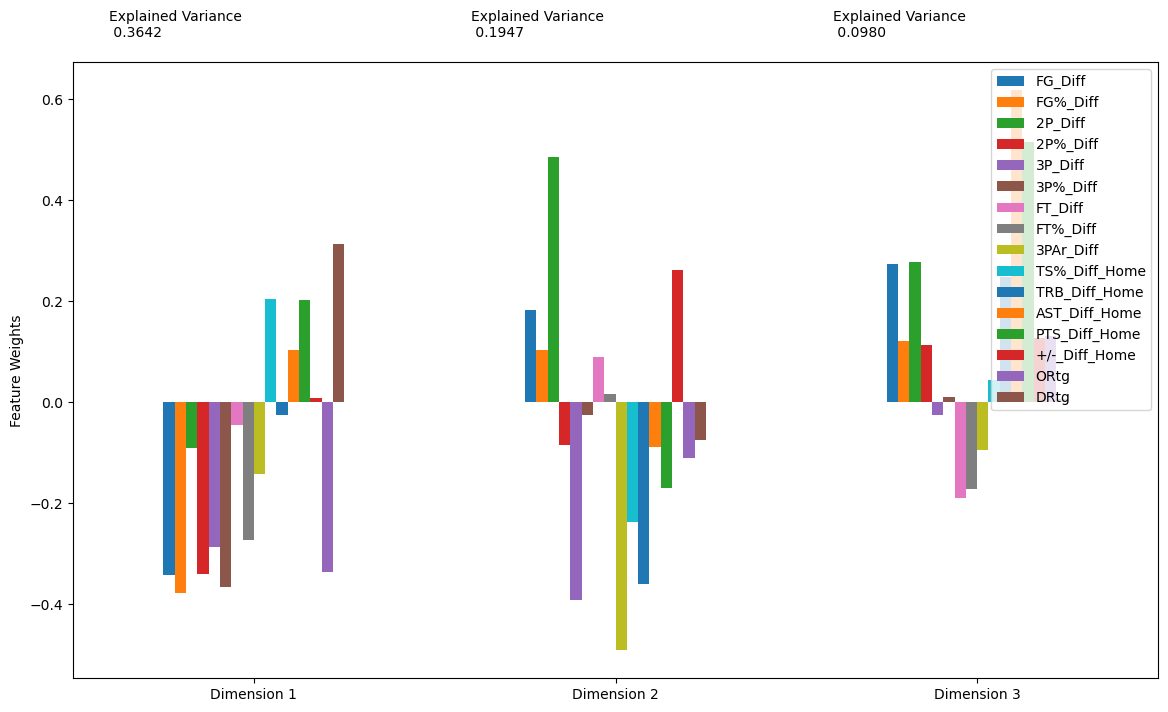

In [5]:
data_scaled, data_pca, dt_components, pca = pca_dimension(df_mean)
from PCAfunctions import *
pca_results(data_scaled, pca)

## Conclusiones:
 ### Dimensión 1
 - Fuertes correlaciones negativas con diferencias en porcentaje de tiros de campo (FG%_Diff), porcentaje de tres puntos (3P%_Diff), y rating ofensivo del equipo (ORtg), lo que sugiere que esta dimensión podría estar capturando la eficiencia ofensiva.
- Notables diferencias negativas en tiros de campo hechos (FG_Diff), tiros de tres puntos hechos (3P_Diff), y porcentaje de tiros de dos puntos (2P%_Diff) también apuntan a una menor efectividad ofensiva del equipo local comparado con el visitante.
- Poca variación en rebotes totales, asistencias, y puntos (TRB_Diff_Home, AST_Diff_Home, PTS_Diff_Home), indicando que estos no son tan influenciales en esta dimensión.

#### Conclusión D1: 
Esta dimensión parece estar principalmente asociada con la efectividad ofensiva, donde valores negativos podrían indicar un rendimiento inferior del equipo local en comparación con el visitante en términos de eficiencia de tiro y scoring. 
#### Juego Ofensivo
 
 ### Dimensión 2 
 - Alta correlación positiva con diferencia en tiros de dos puntos hechos (2P_Diff) pero correlación negativa con diferencia en tiros de tres puntos intentados (3PAr_Diff), sugiriendo un enfoque en el juego interior sobre el juego perimetral.
 - Correlaciones negativas menores con porcentaje de tres puntos (3P%_Diff) y puntos (PTS_Diff_Home), indicando una posible disminución en la eficacia del tiro perimetral.
 - Positiva pero débil correlación con plus/minus (±_Diff_Home), sugiriendo un impacto moderado del juego interior en la ventaja general del juego.
 
 #### Conclusión D2:
 Esta dimensión parece enfocarse en el balance entre el juego interior y perimetral, con un énfasis en la efectividad del juego interior, y cómo este balance impacta en el rendimiento general del equipo local.
#### Juego Interior
 
 ### Dimensión 3 
 - Muy alta correlación positiva con diferencias en asistencias (AST_Diff_Home) y puntos (PTS_Diff_Home), indicando que esta dimensión podría estar capturando elementos del juego en equipo y contribución ofensiva.
 - Moderada correlación positiva con rebotes totales (TRB_Diff_Home), añadiendo un aspecto de control del balón y lucha bajo los tableros.
 
 #### Conclusión D3:
 Esta dimensión podría estar asociada con el juego en equipo y la capacidad de generar oportunidades de anotación a través de buen movimiento de balón y colaboración, junto con un esfuerzo combinado en los rebotes.
#### Juego Colectivo

# Cluesterizar Equipos

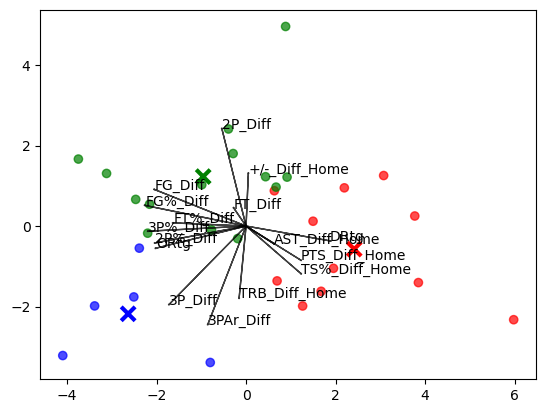

In [6]:
etiquetas = cluster_3d_graphic(data_scaled)

In [7]:
df_mean['Cluster']=etiquetas
df_cluster = pd.merge(df_mean[['Team', 'Cluster']], data_pca, on=['Team'])
df_cluster

,Team,Cluster,dim1,dim2,dim3
0,ATL,2,-0.187938,-0.310827,0.686784
1,BOS,0,-2.508711,-1.761686,1.216086
2,BRK,2,-3.118282,1.307569,-1.696366
3,CHI,2,-0.288692,1.802159,0.753495
4,CHO,1,1.497206,0.119980,-0.369696
5,CLE,2,0.916530,1.216135,0.625624
6,DAL,0,-0.800449,-3.390952,1.473097
7,DEN,2,-2.199217,-0.177238,2.827130
8,DET,1,3.851752,-1.405110,-1.743451
9,GSW,0,-3.385422,-1.985125,0.038359


### Conclusión Especulativa:
#### Cluster 0: 
- Parece alinearse más con la Dimensión 3 (Juego en Equipo y Contribución Ofensiva).
#### Cluster 1: 
- Podría estar más relacionado con la Dimensión 2 (Balance Juego Interior vs. Perimetral).
#### Cluster 2: 
- Parece estar más estrechamente relacionado con la Dimensión 1 (Eficiencia Ofensiva).

# Asignar Cluster a Team - Away

In [8]:
dic_clust = {}
for i in range(3):
    dic_clust[i]=df_cluster[df_cluster['Cluster']==i]['Team'].to_list()

def assign_cluster(home_team):
    if home_team in dic_clust[0]:
        return 0
    elif home_team in dic_clust[1]:
        return 1
    else:
        return 2


df['Clust_H'] = df['Home'].apply(assign_cluster)
df['Clust_A'] = df['Away'].apply(assign_cluster)

In [9]:
#df.to_csv('DataFrameForModel_0.1.csv', index=False)